In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sweetviz as sv


%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [10]:
#loading the dataset using Pandas
data = pd.read_excel('Employee Attrition Data.xlsx')
data.head()# Output shown below

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Non-Travel,247,Research & Development,7,1,Life Sciences,1,1035,2,Female,55,1,5,Research Director,3,Divorced,19973,20284,1,Y,No,22,4,2,80,2,21,3,3,21,16,5,10
1,52,Yes,Travel_Rarely,266,Sales,2,1,Marketing,1,1038,1,Female,57,1,5,Manager,4,Married,19845,25846,1,Y,No,15,3,4,80,1,33,3,3,32,14,6,9
2,49,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,1941,2,Male,42,3,5,Research Director,4,Married,19161,13738,3,Y,No,15,3,4,80,0,28,3,3,5,4,4,3
3,50,No,Travel_Rarely,797,Research & Development,4,1,Life Sciences,1,385,1,Male,96,3,5,Research Director,2,Divorced,19144,15815,3,Y,No,14,3,1,80,2,28,4,2,10,4,1,6
4,40,No,Travel_Rarely,989,Research & Development,4,1,Medical,1,253,4,Female,46,3,5,Manager,3,Married,19033,6499,1,Y,No,14,3,2,80,1,21,2,3,20,8,9,9


#  1. Exploratory Data Analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Non-Travel,247,Research & Development,7,1,Life Sciences,1,1035,2,Female,55,1,5,Research Director,3,Divorced,19973,20284,1,Y,No,22,4,2,80,2,21,3,3,21,16,5,10
1,52,Yes,Travel_Rarely,266,Sales,2,1,Marketing,1,1038,1,Female,57,1,5,Manager,4,Married,19845,25846,1,Y,No,15,3,4,80,1,33,3,3,32,14,6,9
2,49,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,1941,2,Male,42,3,5,Research Director,4,Married,19161,13738,3,Y,No,15,3,4,80,0,28,3,3,5,4,4,3
3,50,No,Travel_Rarely,797,Research & Development,4,1,Life Sciences,1,385,1,Male,96,3,5,Research Director,2,Divorced,19144,15815,3,Y,No,14,3,1,80,2,28,4,2,10,4,1,6
4,40,No,Travel_Rarely,989,Research & Development,4,1,Medical,1,253,4,Female,46,3,5,Manager,3,Married,19033,6499,1,Y,No,14,3,2,80,1,21,2,3,20,8,9,9


In [13]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [14]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

'EmployeeCount','Over18','StandardHours' all have only one unique value and 'EmployeeNumber' has 1470 unique values.  These features aren't useful for us.  So I am going to drop those columns

In [15]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

# Categorical Features

In [16]:
object_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['No' 'Yes']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Marketing' 'Medical' 'Other' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Research Director' 'Manager' 'Manufacturing Director' 'Sales Executive'
 'Healthcare Representative' 'Research Scientist' 'Laboratory Technician'
 'Human Resources' 'Sales Repre

In [17]:
len(object_col)

7

In [18]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data["Attrition"] = label.fit_transform(data.Attrition)

In [19]:
Attrition = data.groupby('Attrition')
Attrition.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,
0,37.56,812.50,8.92,2.93,2.77,65.95,2.77,2.15,2.78,6832.74,14265.78,2.65,15.23,3.15,2.73,0.85,11.86,2.83,2.78,7.37,4.48,2.23,4.37
1,33.61,750.36,10.63,2.84,2.46,65.57,2.52,1.64,2.47,4787.09,14559.31,2.94,15.10,3.16,2.60,0.53,8.24,2.62,2.66,5.13,2.90,1.95,2.85


# Numerical Features

In [20]:
disc_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() < 30:
        print(f"{column} : {data[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [0 1]
DistanceFromHome : [ 7  2  4  3  8 10  1 29 24  9 18  5  6 17 23 26 16 20 19 13 22 25 27 11
 15 14 28 21 12]
Education : [1 2 3 4 5]
EnvironmentSatisfaction : [2 1 4 3]
JobInvolvement : [1 3 2 4]
JobLevel : [5 4 3 2 1]
JobSatisfaction : [3 4 2 1]
NumCompaniesWorked : [1 3 7 2 0 5 6 4 8 9]
PercentSalaryHike : [22 15 14 12 11 21 16 18 23 25 13 17 19 20 24]
PerformanceRating : [4 3]
RelationshipSatisfaction : [2 4 1 3]
StockOptionLevel : [2 1 0 3]
TrainingTimesLastYear : [3 4 2 5 6 0 1]
WorkLifeBalance : [3 2 4 1]
YearsInCurrentRole : [16 14  4  8  9  7  3  6  0  2 15 10 11  5  1 17 13 18 12]
YearsSinceLastPromotion : [ 5  6  4  1  9  2 11  0 14  8  3  7 13 15 12 10]
YearsWithCurrManager : [10  9  3  6  2  8  0 12  4  7  1 15 13 11  5 14 17 16]


In [21]:

cont_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() > 30:
        print(f"{column} : Minimum: {data[column].min()}, Maximum: {data[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


# Data Visualization

In [22]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    data[data["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    data[data["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to 

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

RecursionError: maximum recursion depth exceeded while calling a Python object

<Figure size 1440x1440 with 16 Axes>

It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't have big impact on the determination of Attrition of employees.

In [23]:
# Dropping features that have not impact on model
#Remove some useless columns
data.drop(['EnvironmentSatisfaction','JobSatisfaction','PerformanceRating','RelationshipSatisfaction' ], axis="columns", inplace=True)

In [24]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    data[data["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    data[data["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to 

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

RecursionError: maximum recursion depth exceeded while calling a Python object

<Figure size 1440x720 with 7 Axes>

In [25]:
import sweetviz as sv
employee_churn_analyzereport = sv.analyze(data)
employee_churn_analyzereport.show_html('attrition_eda2.html', open_browser=False)


Report attrition_eda2.html was generated!


Conclusions:

The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The workers in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.



# 3. Correlation Matrix

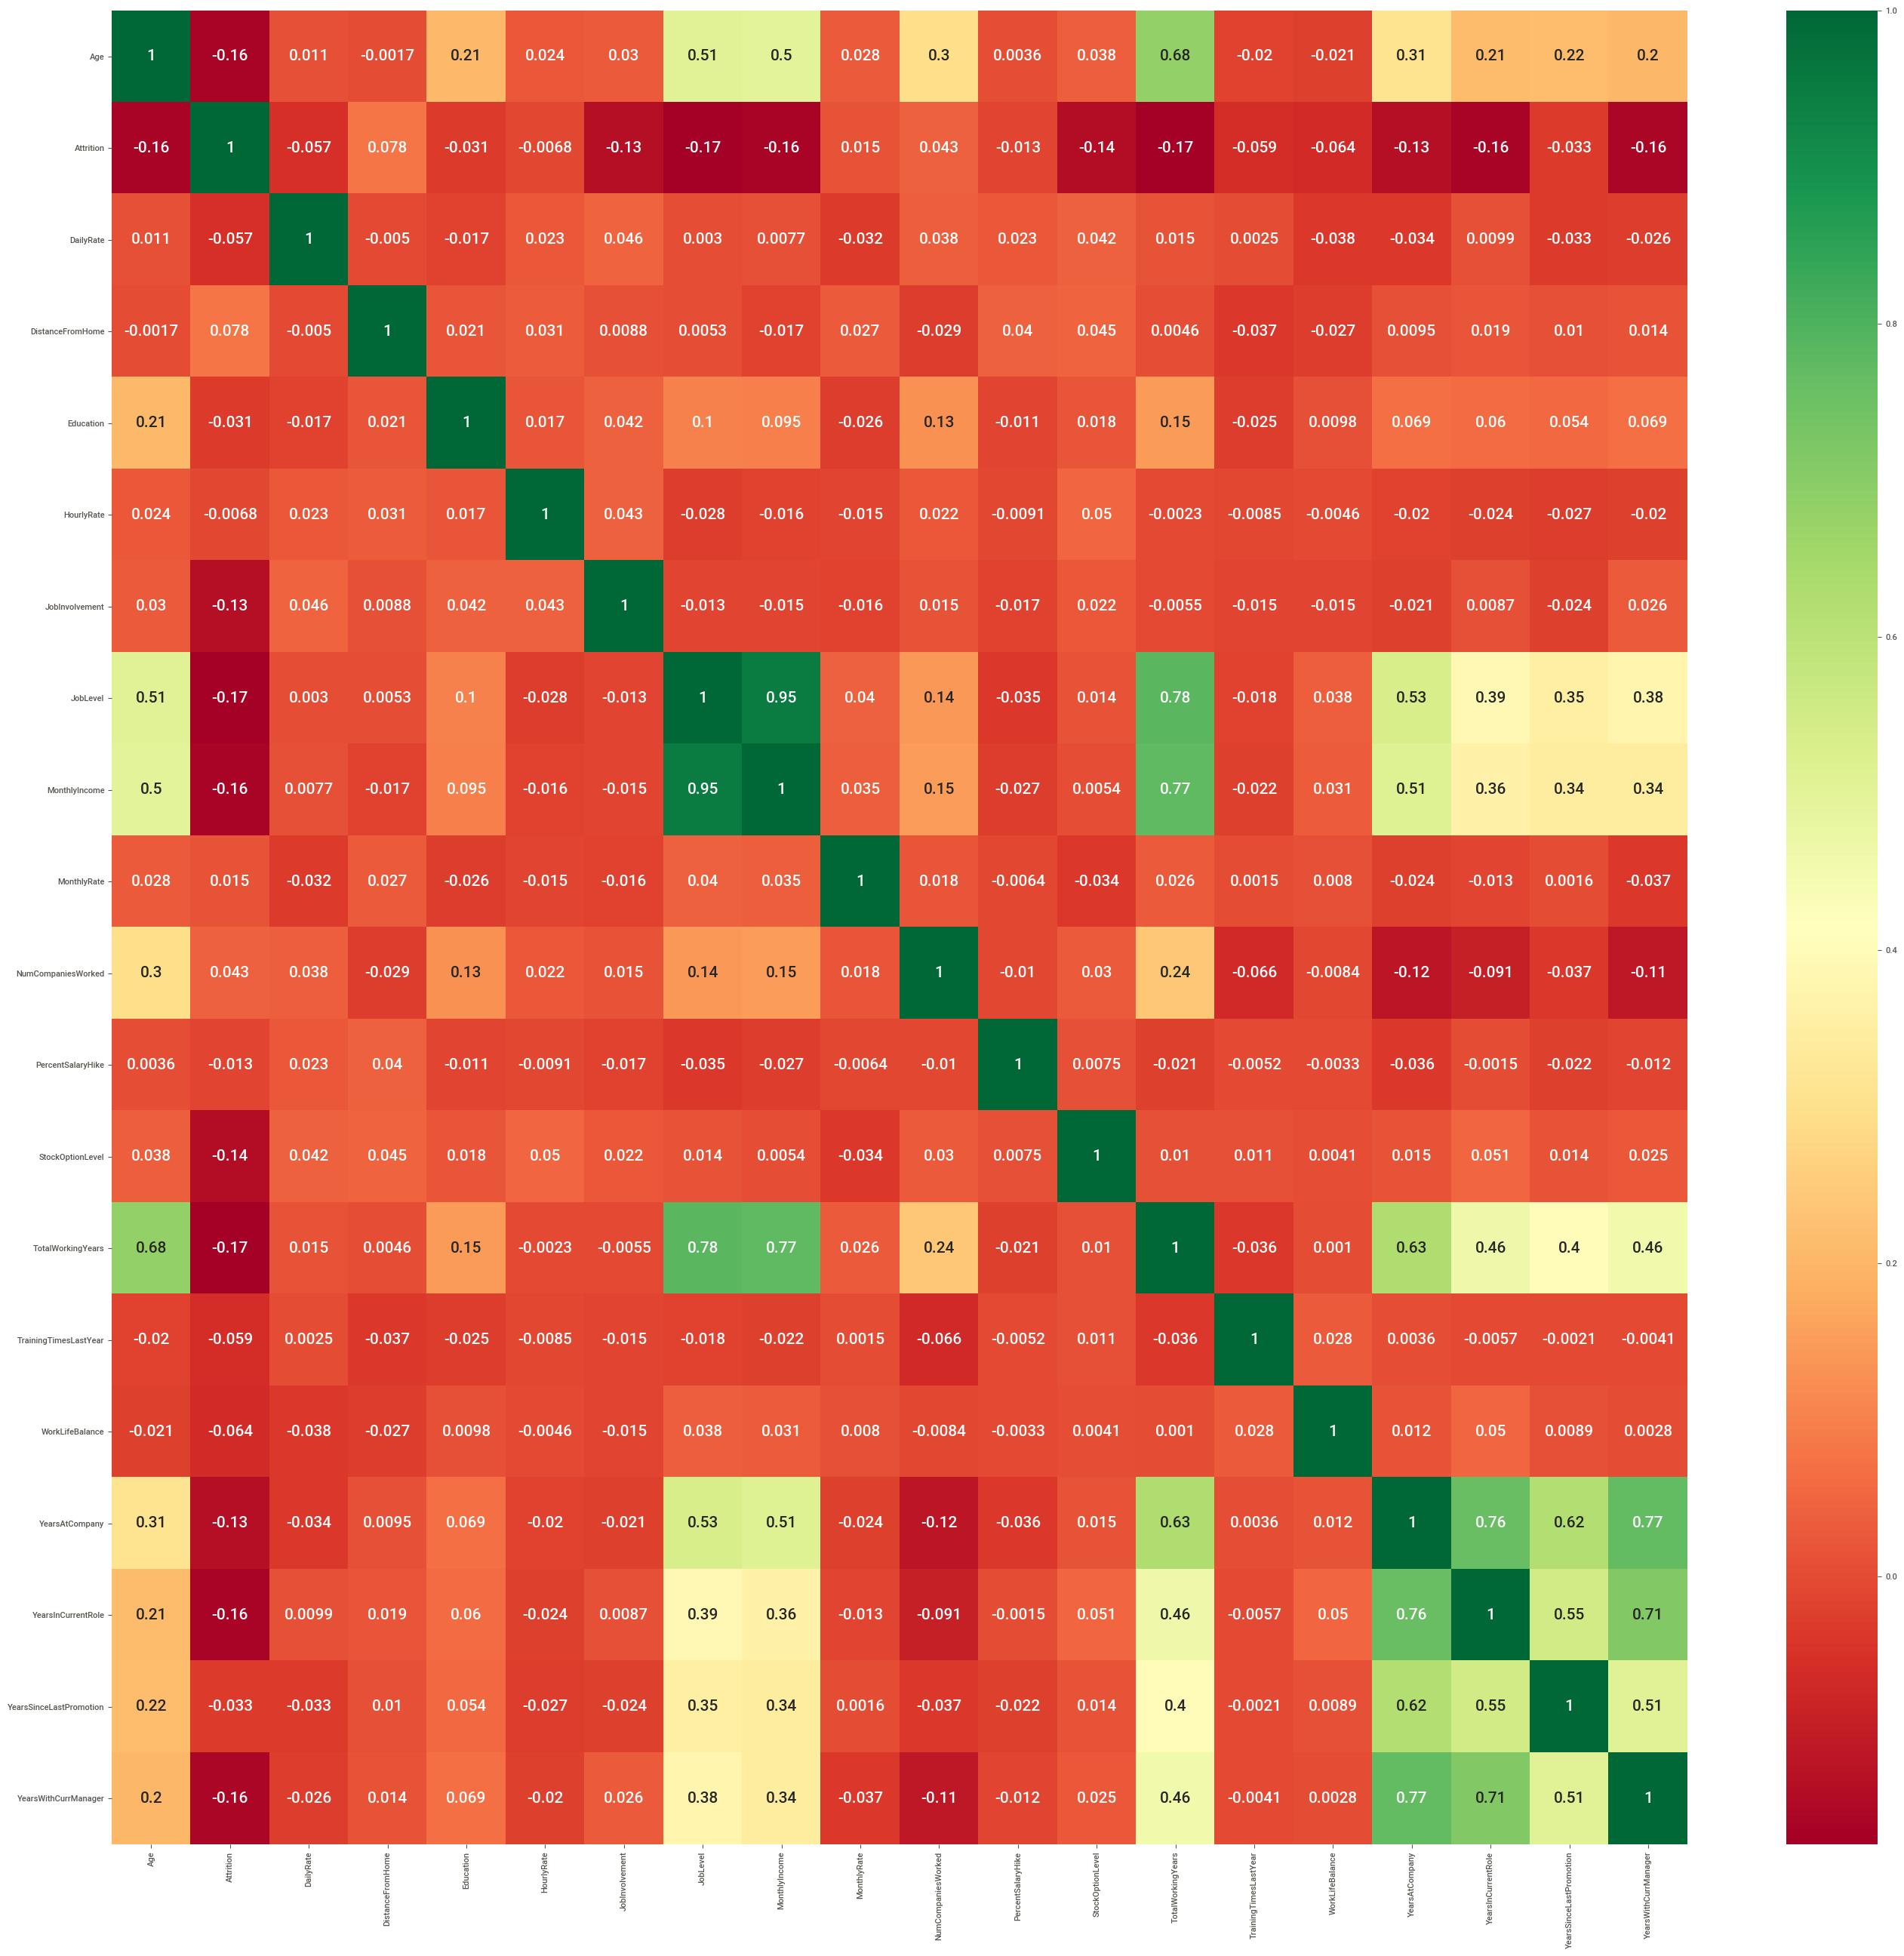

In [26]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

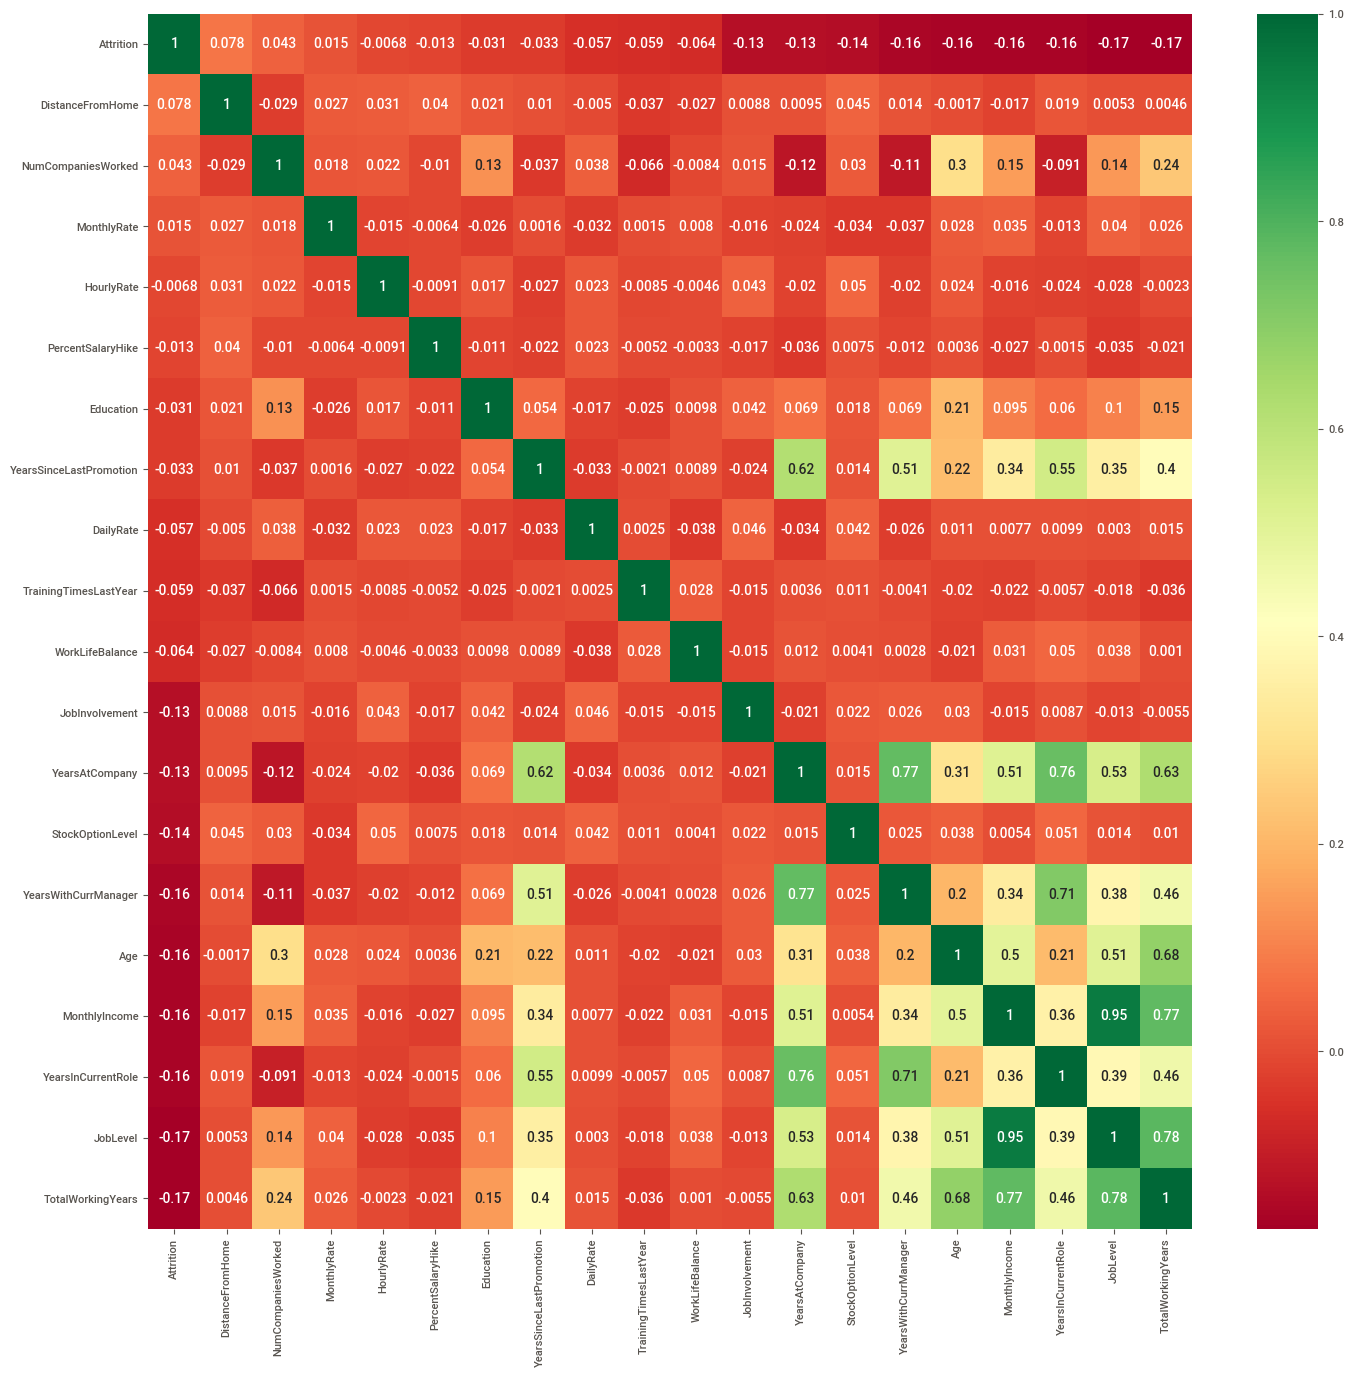

In [27]:
col = data.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(data[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

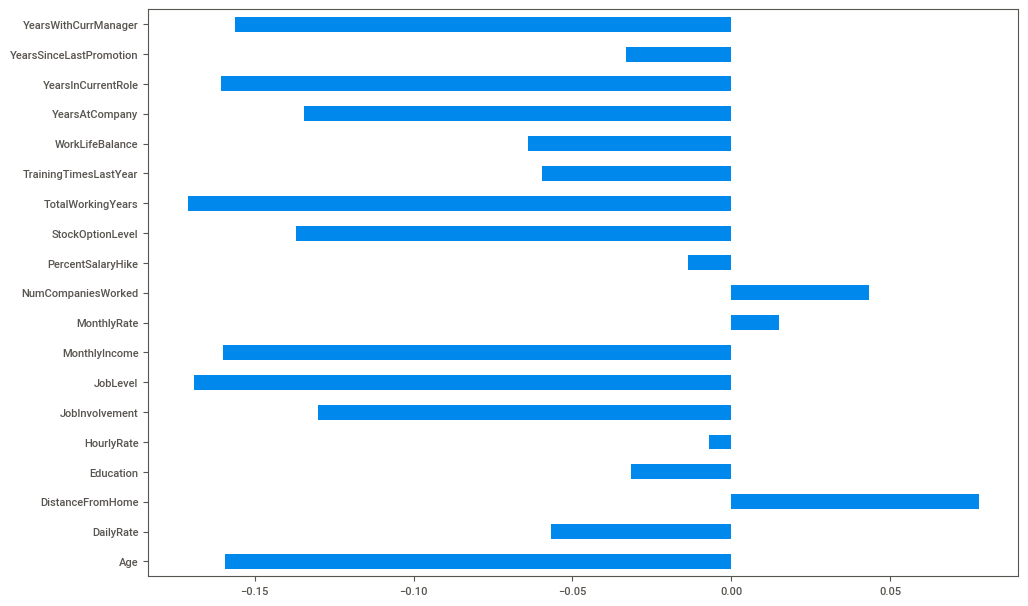

In [28]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).plot(kind='barh', figsize=(10, 7))

Analysis of correlation results (sample analysis):

Monthly income is highly correlated with Job level.
Job level is highly correlated with total working hours.
Monthly income is highly correlated with total working hours.
Age is also positively correlated with the Total working hours.
Marital status and stock option level are negatively correlated

# 4. Data Processing

In [29]:
# Transform categorical data into dummies
dummy_col = [column for column in data.drop('Attrition', axis=1).columns if data[column].nunique() < 20]
data2 = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int32 
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   Education                1470 non-null   int64 
 7   EducationField           1470 non-null   object
 8   Gender                   1470 non-null   object
 9   HourlyRate               1470 non-null   int64 
 10  JobInvolvement           1470 non-null   int64 
 11  JobLevel                 1470 non-null   int64 
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  MonthlyIncome            1470 non-null  

In [30]:
print(data2.shape)

# Remove duplicate Features
data2 = data2.T.drop_duplicates()
data2 = data2.T

# Remove Duplicate Rows
data2.drop_duplicates(inplace=True)

print(data2.shape)

(1470, 126)
(1470, 126)


In [31]:
data2.shape

(1470, 126)

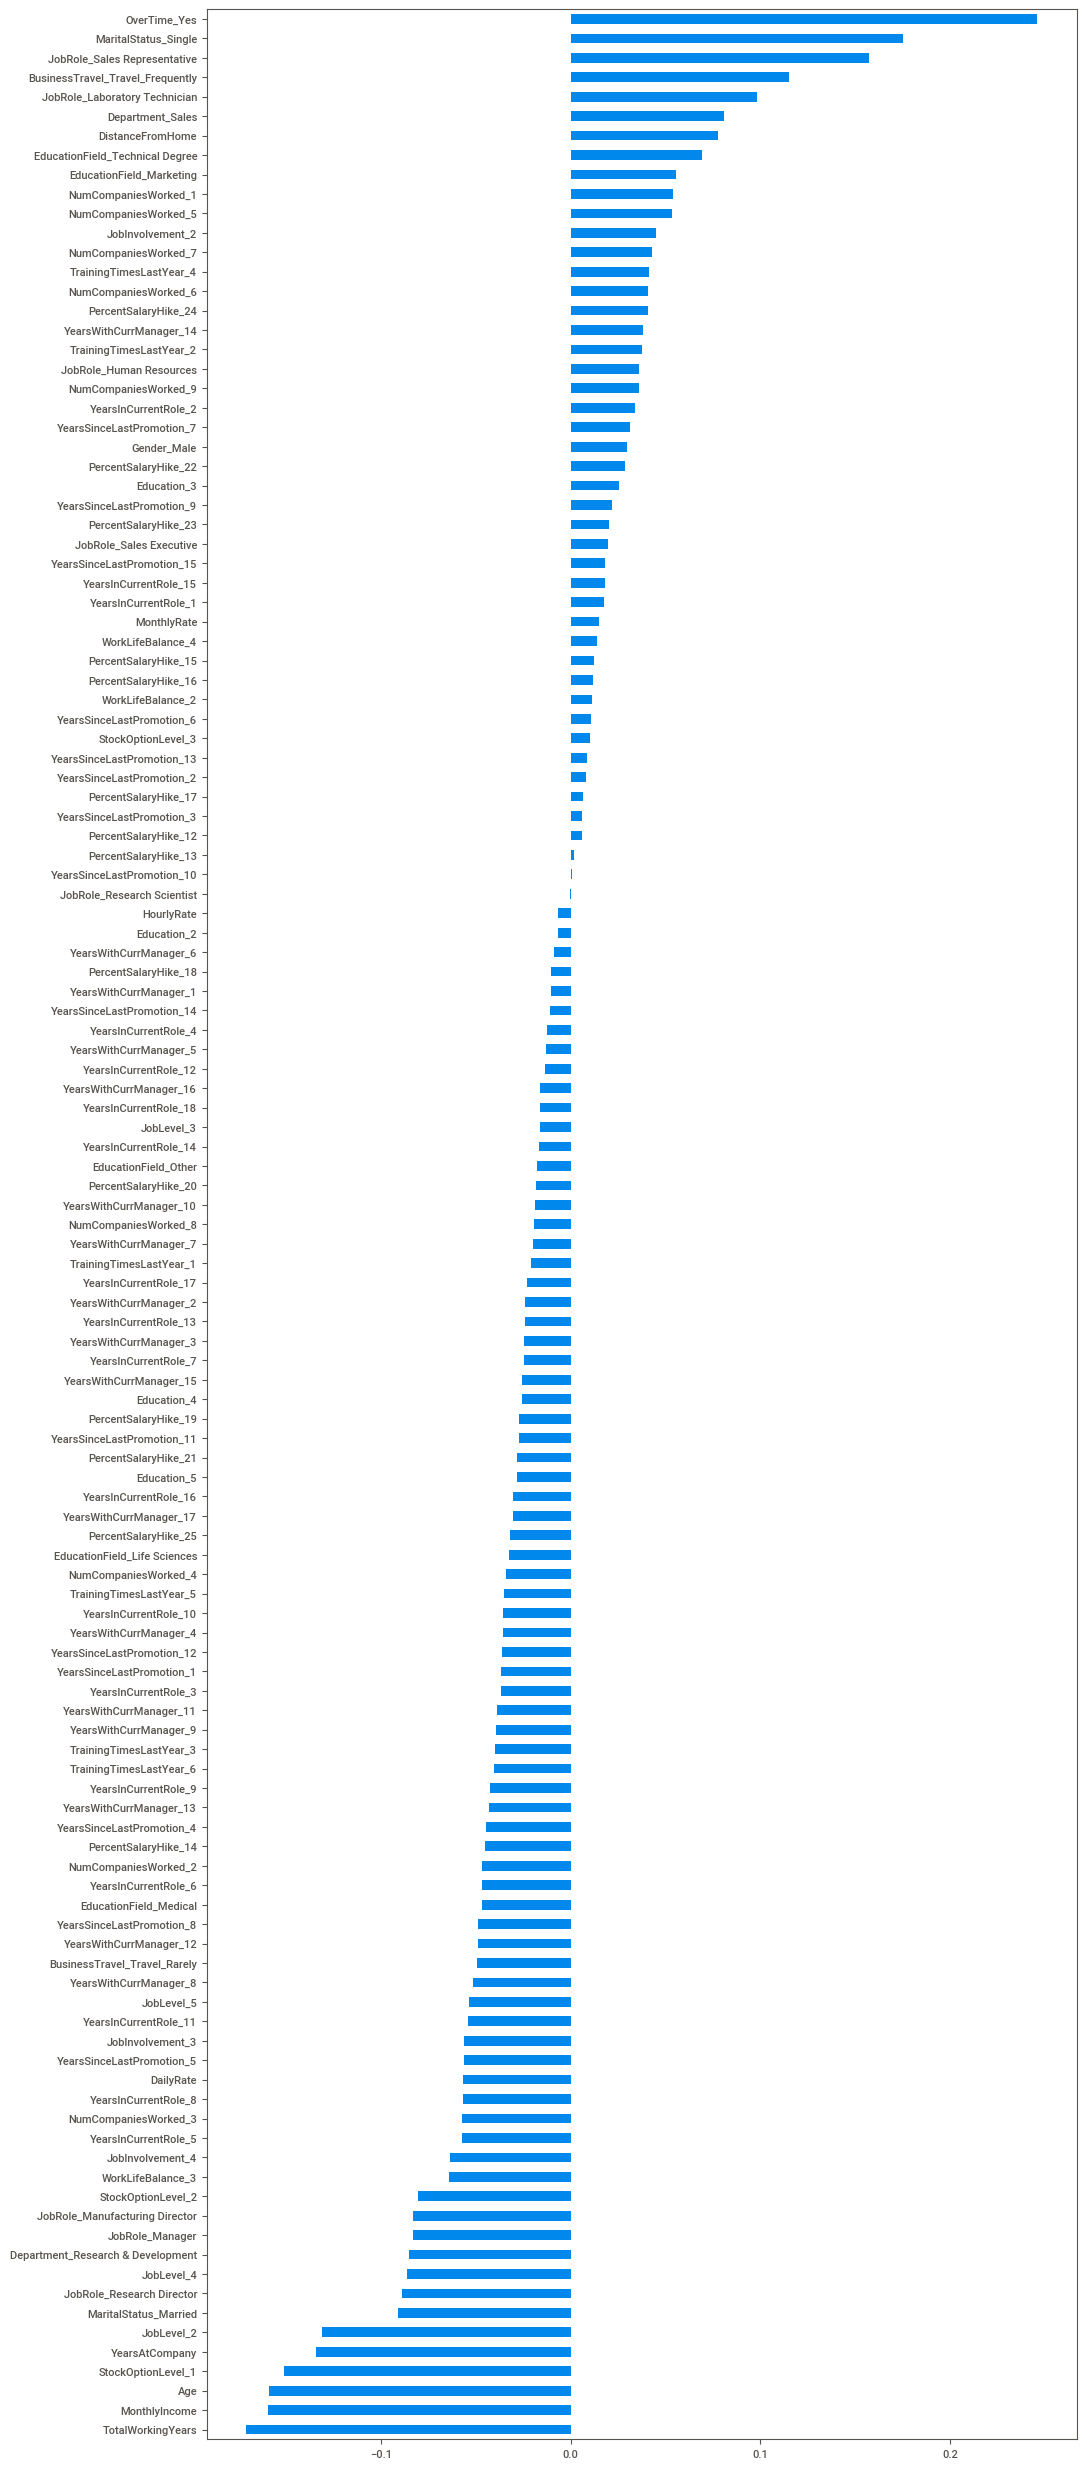

In [32]:
data2.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [33]:
feature_correlation = data2.drop('Attrition', axis=1).corrwith(data2.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

88

#  5. Applying Machine Learning Algorithms

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data2.drop('Attrition', axis=1)
y = data2.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [89]:
import sweetviz as sv
compare_reporteda = sv.compare([X_train, 'Train'],[X_test, 'Test'])
compare_reporteda.show_html('compare_eda.html',open_browser=False)


Report compare_eda.html was generated!


In [90]:
analyze_reporteda = sv.analyze(data2)
analyze_reporteda.show_html('analyze_eda.html', open_browser=False)


Report analyze_eda.html was generated!


In [35]:
def feature_imp(data, model):
    fi = pd.DataFrame()
    fi["feature"] = data.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

What defines success?¶
We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of 84.01%.

In [36]:
y_test.value_counts()[0] / y_test.shape[0]

0.8401360544217688

In [37]:
#Imbalanced data
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============CONTROL GRP=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============WHITE LISTERS=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============CONTROL GRP=================
Staying Rate: 83.84%
Leaving Rate: 16.16%
===============WHITE LISTERS=================
Staying Rate: 84.01%
Leaving Rate: 15.99%


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")  
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# 5. 1. Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train_std, y_train)

print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 90.48%
_______________________________________________
Classification Report:	Precision Score: 80.00%
			Recall Score: 54.74%
			F1 score: 65.00%
_______________________________________________
Confusion Matrix: 
 [[960  26]
 [ 86 104]]

Test Result:
Accuracy Score: 88.10%
_______________________________________________
Classification Report:	Precision Score: 70.00%
			Recall Score: 44.68%
			F1 score: 54.55%
_______________________________________________
Confusion Matrix: 
 [[238   9]
 [ 26  21]]



# 5. 2. Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1200, 
                                      bootstrap=False,
                                     class_weight={0:stay, 1:leave}
                                    )
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[986   0]
 [  0 190]]

Test Result:
Accuracy Score: 87.07%
_______________________________________________
Classification Report:	Precision Score: 84.62%
			Recall Score: 23.40%
			F1 score: 36.67%
_______________________________________________
Confusion Matrix: 
 [[245   2]
 [ 36  11]]



Text(0.5, 1.0, 'Feature Importance according to Random Forest')

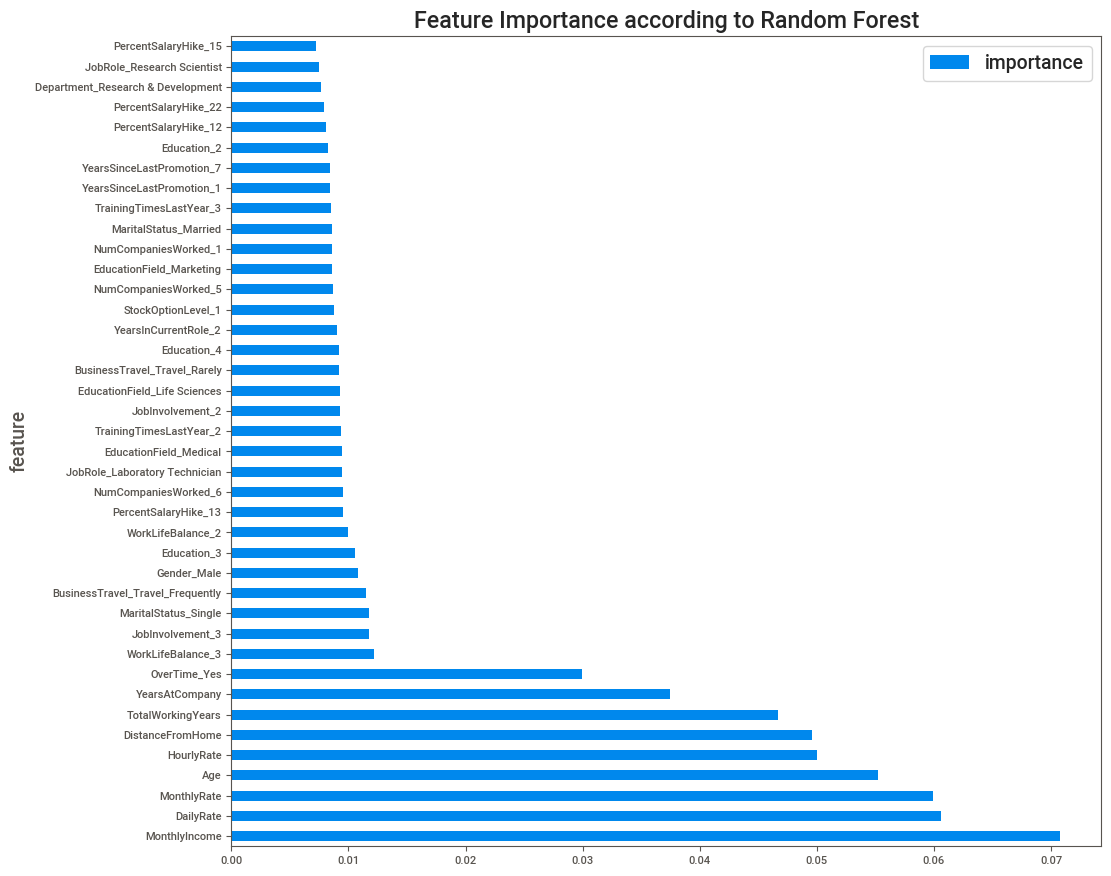

In [41]:
df = feature_imp(X, rand_forest)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

# 5.3 Support Vector Machine

In [42]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train_std, y_train)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 91.50%
_______________________________________________
Classification Report:	Precision Score: 84.09%
			Recall Score: 58.42%
			F1 score: 68.94%
_______________________________________________
Confusion Matrix: 
 [[965  21]
 [ 79 111]]

Test Result:
Accuracy Score: 87.76%
_______________________________________________
Classification Report:	Precision Score: 68.97%
			Recall Score: 42.55%
			F1 score: 52.63%
_______________________________________________
Confusion Matrix: 
 [[238   9]
 [ 27  20]]



# 5.4 XGBoost Classifier

In [43]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[986   0]
 [  0 190]]

Test Result:
Accuracy Score: 86.05%
_______________________________________________
Classification Report:	Precision Score: 60.71%
			Recall Score: 36.17%
			F1 score: 45.33%
_______________________________________________
Confusion Matrix: 
 [[236  11]
 [ 30  17]]



Text(0.5, 1.0, 'Feature Importance according to XGBoost')

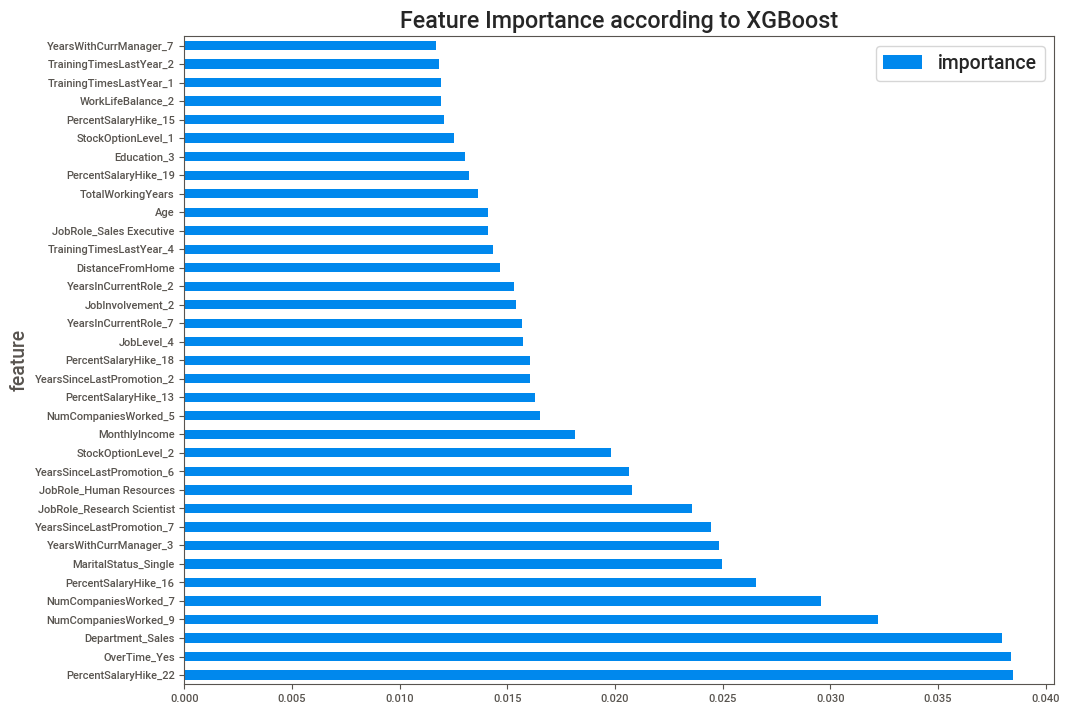

In [44]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

# 5.5 Artificial Neural Networks (ANNs)

In [45]:
X_train_std = np.array(X_train_std)
X_test_std = np.array(X_test_std)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [46]:
def print_score_ann(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

r = model.fit(X_train_std, y_train, 
              validation_data=(X_test_std, y_test), 
              epochs=50, 
              class_weight={0:1, 1:2}
             )

Epoch 1/50
37/37 [==============================] - 1s 27ms/step - loss: 0.7095 - accuracy: 0.8240 - val_loss: 0.5508 - val_accuracy: 0.8401
Epoch 2/50
37/37 [==============================] - 0s 8ms/step - loss: 0.6616 - accuracy: 0.8367 - val_loss: 0.5438 - val_accuracy: 0.8401
Epoch 3/50
37/37 [==============================] - 0s 8ms/step - loss: 0.6306 - accuracy: 0.8393 - val_loss: 0.5096 - val_accuracy: 0.8401
Epoch 4/50
37/37 [==============================] - 0s 7ms/step - loss: 0.5916 - accuracy: 0.8410 - val_loss: 0.4850 - val_accuracy: 0.8333
Epoch 5/50
37/37 [==============================] - 0s 8ms/step - loss: 0.5276 - accuracy: 0.8444 - val_loss: 0.4978 - val_accuracy: 0.8095
Epoch 6/50
37/37 [==============================] - 0s 8ms/step - loss: 0.4777 - accuracy: 0.8537 - val_loss: 0.4861 - val_accuracy: 0.8333
Epoch 7/50
37/37 [==============================] - 0s 7ms/step - loss: 0.4457 - accuracy: 0.8699 - val_loss: 0.5401 - val_accuracy: 0.7415
Epoch 8/50
37/37 [=

In [48]:
training_score = model.evaluate(X_train_std, y_train)
testing_score = model.evaluate(X_test_std, y_test)

print(f"TRAINING SCORE: {training_score}")
print(f"TESTING SCORE: {testing_score}")

10/10 [==============================] - 0s 2ms/step - loss: 2.3965 - accuracy: 0.8401
TRAINING SCORE: [0.0031415114644914865, 1.0]
TESTING SCORE: [2.396528720855713, 0.8401360511779785]


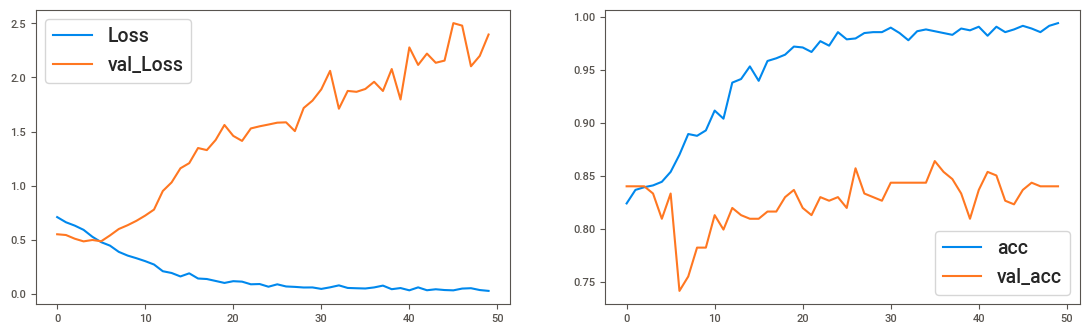

In [49]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [50]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

print_score_ann(y_train, y_train_pred.round(), train=True)
print_score_ann(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[986   0]
 [  0 190]]

Test Result:
Accuracy Score: 84.01%
_______________________________________________
Classification Report:	Precision Score: 50.00%
			Recall Score: 44.68%
			F1 score: 47.19%
_______________________________________________
Confusion Matrix: 
 [[226  21]
 [ 26  21]]



#  6 Balancing the dataset

In [51]:
X1 = data2.drop('Attrition', axis=1)
y1 = data2.Attrition

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Concatinating X_train and y_train
df_2 = pd.concat([pd.DataFrame(X1_train), pd.DataFrame(y1_train)], axis=1)
df_2.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,NumCompaniesWorked_1,...,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17,Attrition
1097,29,896,18,86,2389,14961,4,4,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
727,28,1423,1,72,1563,12530,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
254,31,307,29,71,3479,11652,6,5,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1175,50,869,3,86,2683,3810,3,3,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1341,44,1315,3,35,19513,9358,26,2,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
y1_test.value_counts()[0] / y1_test.shape[0]

0.8605442176870748

In [53]:
#After balancing the Data
stay = (y1_train.value_counts()[0] / y1_train.shape)[0]
leave = (y1_train.value_counts()[1] / y1_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y1_test.value_counts()[0] / y1_test.shape)[0]
leave = (y1_test.value_counts()[1] / y1_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.33%
Leaving Rate: 16.67%
===============TEST=================
Staying Rate: 86.05%
Leaving Rate: 13.95%


In [54]:
df_2.shape

(1176, 126)

In [55]:
df_2.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,NumCompaniesWorked_1,...,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17,Attrition
count,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,...,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00
mean,36.97,792.00,9.18,65.93,6514.80,14210.39,11.30,6.99,0.19,0.71,0.64,0.31,0.19,0.39,0.28,0.03,0.41,0.11,0.31,0.06,0.09,0.60,0.26,0.58,0.10,0.37,0.14,0.07,0.05,0.04,0.17,0.07,0.10,0.05,0.20,0.22,0.06,0.45,0.32,0.36,...,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.25,0.11,0.04,0.04,0.03,0.02,0.05,0.01,0.01,0.00,0.02,0.01,0.01,0.01,0.01,0.05,0.24,0.10,0.07,0.02,0.02,0.14,0.07,0.05,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.17
std,9.17,404.65,8.15,20.30,4752.70,7138.77,7.75,6.18,0.39,0.46,0.48,0.46,0.39,0.49,0.45,0.17,0.49,0.32,0.46,0.23,0.28,0.49,0.44,0.49,0.30,0.48,0.35,0.25,0.22,0.19,0.38,0.26,0.30,0.22,0.40,0.42,0.24,0.50,0.47,0.48,...,0.09,0.10,0.09,0.07,0.08,0.04,0.04,0.43,0.31,0.19,0.20,0.17,0.15,0.21,0.11,0.12,0.06,0.14,0.07,0.08,0.08,0.10,0.21,0.43,0.30,0.25,0.13,0.13,0.35,0.26,0.21,0.12,0.12,0.11,0.09,0.07,0.06,0.04,0.07,0.37
min,18.00,103.00,1.00,30.00,1009.00,2097.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,455.75,2.00,49.00,2869.00,7809.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [56]:
Attrition2 = df_2.groupby('Attrition')
Attrition2.mean()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,NumCompaniesWorked_1,...,YearsInCurrentRole_11,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.64,801.87,8.89,66.06,6858.29,14155.82,11.86,7.35,0.17,0.72,0.66,0.29,0.19,0.38,0.28,0.03,0.42,0.11,0.32,0.06,0.08,0.59,0.25,0.60,0.11,0.40,0.14,0.08,0.06,0.03,0.15,0.08,0.11,0.06,0.20,0.22,0.04,0.47,0.29,0.35,...,0.02,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.26,0.11,0.03,0.04,0.03,0.02,0.04,0.01,0.01,0.00,0.02,0.01,0.01,0.01,0.01,0.05,0.25,0.11,0.07,0.02,0.02,0.15,0.08,0.05,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.01
1,33.63,742.68,10.63,65.28,4797.36,14483.24,8.47,5.22,0.30,0.65,0.56,0.39,0.19,0.41,0.26,0.02,0.39,0.15,0.28,0.04,0.12,0.68,0.31,0.52,0.05,0.23,0.14,0.02,0.02,0.05,0.27,0.03,0.05,0.01,0.18,0.23,0.14,0.34,0.50,0.40,...,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.21,0.12,0.05,0.02,0.01,0.03,0.06,0.00,0.02,0.01,0.01,0.00,0.01,0.00,0.02,0.05,0.21,0.07,0.05,0.02,0.02,0.13,0.05,0.03,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00


In [57]:
from sklearn.utils import resample

minority_class = df_2[df_2.Attrition == 1]
majority_class = df_2[df_2.Attrition == 0]

majority_downsample = resample(majority_class, replace=False, 
                               n_samples=minority_class.shape[0], 
                               random_state=42)

df_2 = pd.concat([majority_downsample, minority_class])
df_2.Attrition.value_counts()

1    196
0    196
Name: Attrition, dtype: int64

In [58]:
X1_train = df_2.drop('Attrition', axis=1)
y1_train = df_2.Attrition

scaler = StandardScaler()
X1_train_std = scaler.fit_transform(X1_train)
X1_test_std = scaler.transform(X1_test)
X1_std = scaler.transform(X1)

# 6.1 Logistic Regression 

In [59]:
lr_classifier1 = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier1.fit(X1_train_std, y1_train)

print_score(lr_classifier1, X1_train_std, y1_train, X1_test_std, y1_test, train=True)
print_score(lr_classifier1, X1_train_std, y1_train, X1_test_std, y1_test, train=False)

Train Result:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:	Precision Score: 85.35%
			Recall Score: 86.22%
			F1 score: 85.79%
_______________________________________________
Confusion Matrix: 
 [[167  29]
 [ 27 169]]

Test Result:
Accuracy Score: 70.41%
_______________________________________________
Classification Report:	Precision Score: 28.70%
			Recall Score: 75.61%
			F1 score: 41.61%
_______________________________________________
Confusion Matrix: 
 [[176  77]
 [ 10  31]]



In [60]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV1 = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV1, X1_train, y1_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase th

10-fold cross validation average accuracy: 0.444


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 6. 2. Random Forest Classifier

In [61]:
rand_forest1 = RandomForestClassifier(n_estimators=1500, 
                                     bootstrap=True, 
                                     oob_score=True
                                    )
rand_forest1.fit(X1_train, y1_train)

print_score(rand_forest1, X1_train, y1_train, X1_test, y1_test, train=True)
print_score(rand_forest1, X1_train, y1_train, X1_test, y1_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[196   0]
 [  0 196]]

Test Result:
Accuracy Score: 77.55%
_______________________________________________
Classification Report:	Precision Score: 35.63%
			Recall Score: 75.61%
			F1 score: 48.44%
_______________________________________________
Confusion Matrix: 
 [[197  56]
 [ 10  31]]



In [62]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X1_train, y1_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.623


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, rand_forest1.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       253
           1       0.36      0.76      0.48        41

    accuracy                           0.78       294
   macro avg       0.65      0.77      0.67       294
weighted avg       0.87      0.78      0.80       294



# 6.2.1 Feature Importance according to Random Forest

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

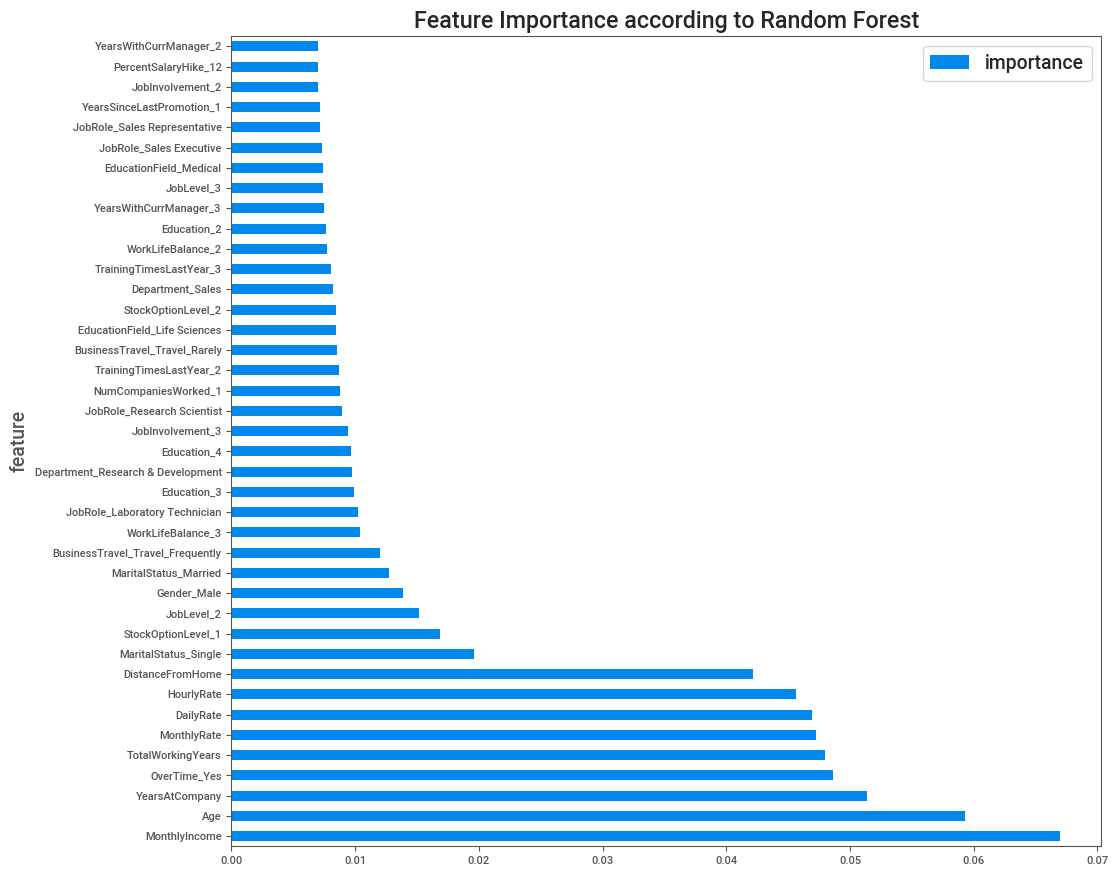

In [64]:
df_rf = feature_imp(X1, rand_forest1)[:40]
df_rf.set_index('feature', inplace=True)
df_rf.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

# 6. 3. Support Vector Machine

In [65]:
svc1 = SVC(kernel='linear')
svc1.fit(X1_train_std, y1_train)

print_score(svc1, X1_train_std, y1_train, X1_test_std, y1_test, train=True)
print_score(svc1, X1_train_std, y1_train, X1_test_std, y1_test, train=False)

Train Result:
Accuracy Score: 89.29%
_______________________________________________
Classification Report:	Precision Score: 89.29%
			Recall Score: 89.29%
			F1 score: 89.29%
_______________________________________________
Confusion Matrix: 
 [[175  21]
 [ 21 175]]

Test Result:
Accuracy Score: 71.77%
_______________________________________________
Classification Report:	Precision Score: 28.57%
			Recall Score: 68.29%
			F1 score: 40.29%
_______________________________________________
Confusion Matrix: 
 [[183  70]
 [ 13  28]]



In [66]:
print(classification_report(y1_test, svc1.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       253
           1       0.14      1.00      0.24        41

    accuracy                           0.14       294
   macro avg       0.07      0.50      0.12       294
weighted avg       0.02      0.14      0.03       294



C:\Users\Hi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV2 = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV2, X1_train, y1_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy(Balanced Data): %.3f" % (results.mean()))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy(Balanced Data): 0.230


# 6. 4. XGBoost classifier

In [68]:
xgb_clf1 = XGBClassifier()
xgb_clf1.fit(X1_train, y1_train)

print_score(xgb_clf1, X1_train, y1_train, X1_test, y1_test, train=True)
print_score(xgb_clf1, X1_train, y1_train, X1_test, y1_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[196   0]
 [  0 196]]

Test Result:
Accuracy Score: 70.07%
_______________________________________________
Classification Report:	Precision Score: 26.26%
			Recall Score: 63.41%
			F1 score: 37.14%
_______________________________________________
Confusion Matrix: 
 [[180  73]
 [ 15  26]]



Text(0.5, 1.0, 'Feature Importance according to XGBoost with Balanced Data set')

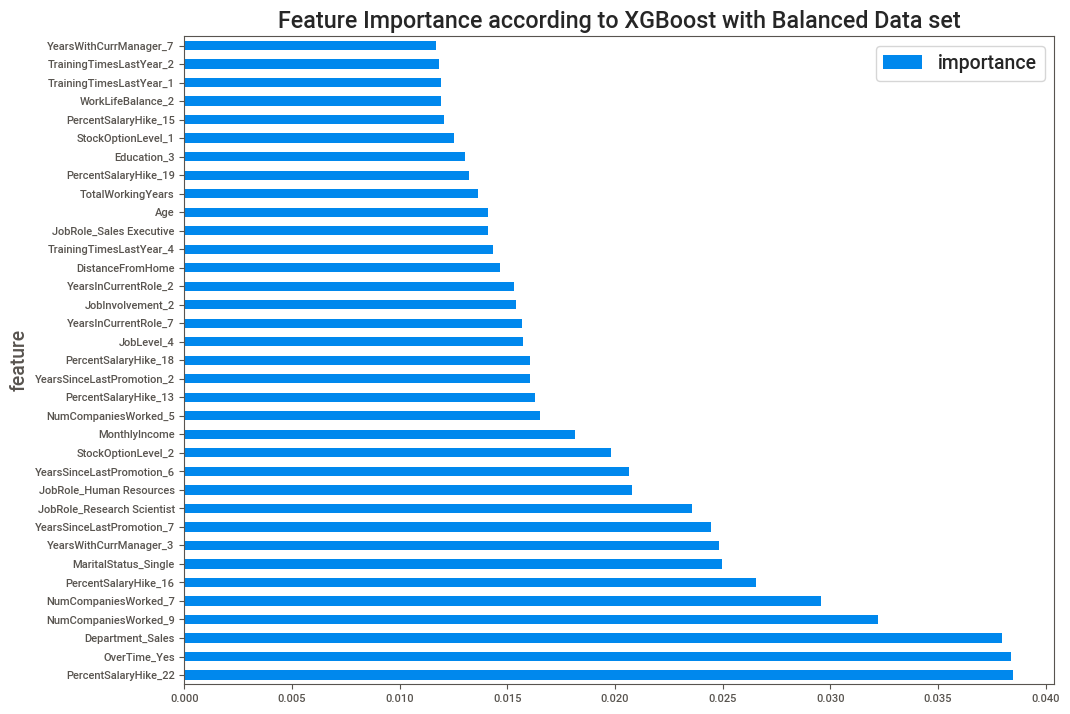

In [69]:
df_xgb = feature_imp(X1, xgb_clf)[:35]
df_xgb.set_index('feature', inplace=True)
df_xgb.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost with Balanced Data set')

In [70]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=50, random_state=7)
modelCV3 = XGBClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV3, X1_train, y1_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.665


# 6.5 Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [72]:
clf_tree1 = DecisionTreeClassifier();
clf_reg1 = LogisticRegression();

clf_tree1.fit(X1_train, y1_train); 
clf_reg1.fit(X1_train, y1_train);

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X1_train, y1_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.549


In [74]:
y_score1 = clf_tree1.predict_proba(X1_test)[:,1]
y_score2 = clf_tree1.predict_proba(X1_test)[:,1]

In [75]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y1_test, y_score1)
    
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y1_test, y_score2)

In [76]:
    print('roc_auc_score for DecisionTree: ', roc_auc_score(y1_test, y_score1))
    print('roc_auc_score for Logistic Regression: ', roc_auc_score(y1_test, y_score2))

roc_auc_score for DecisionTree:  0.6201195411163598
roc_auc_score for Logistic Regression:  0.6201195411163598


# ROC curve

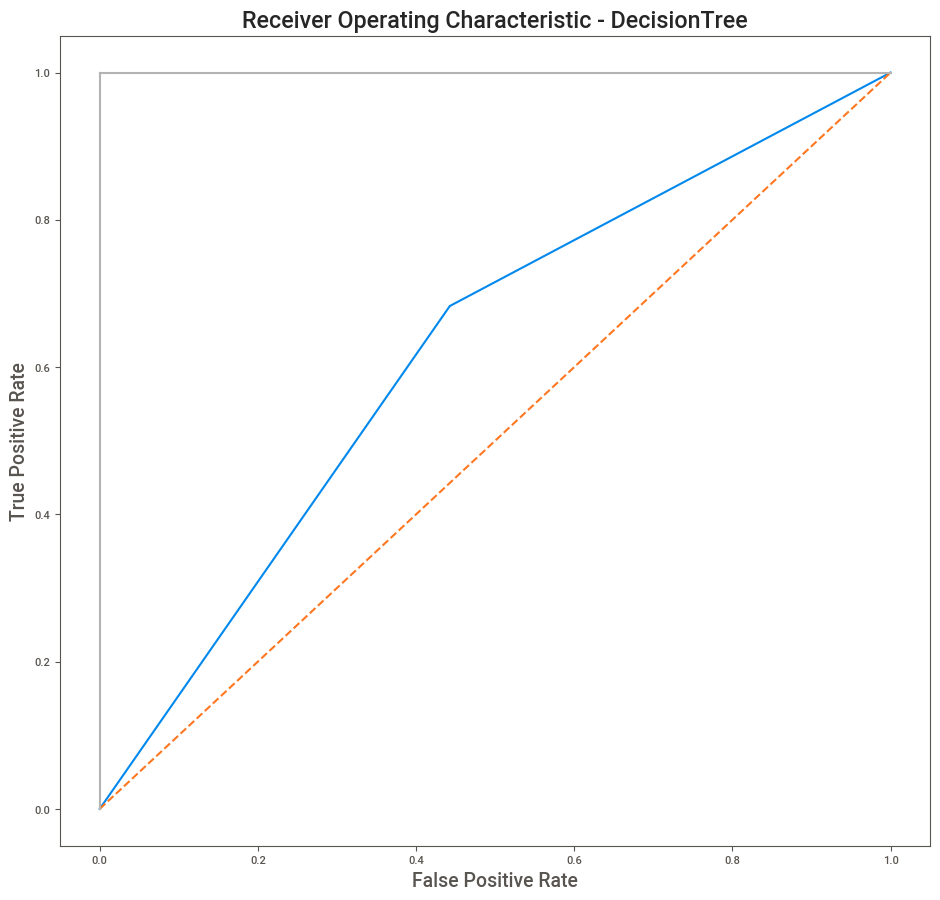

In [77]:
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

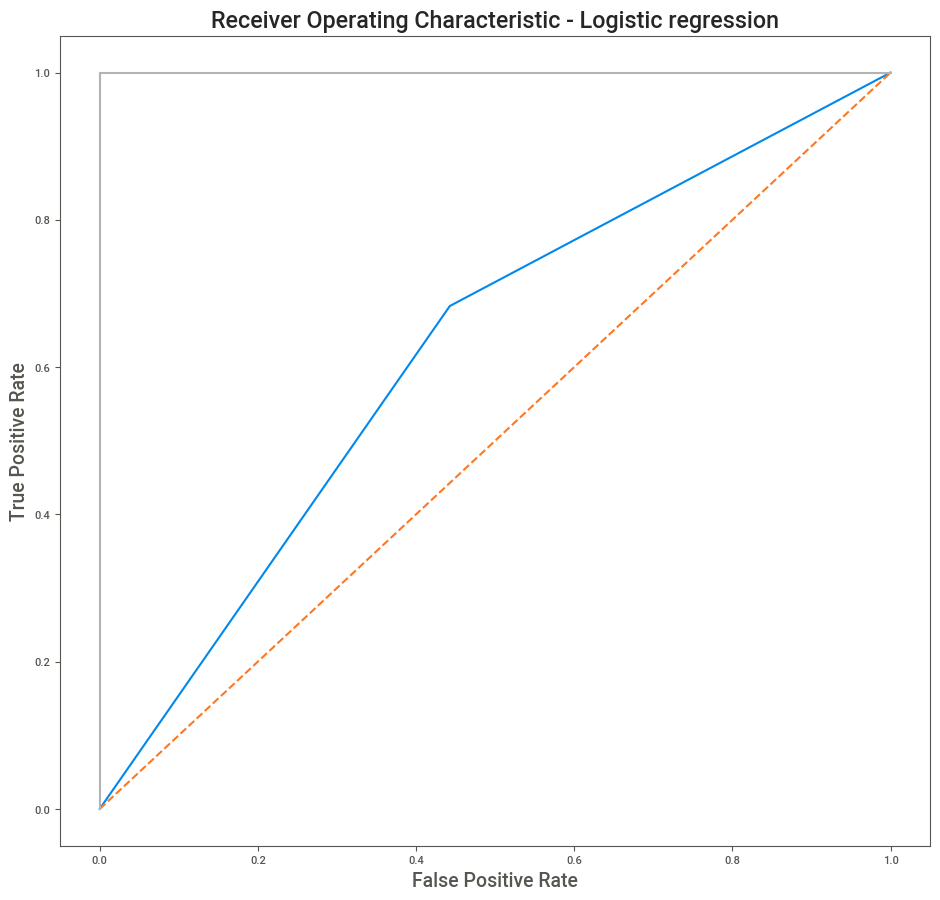

In [78]:
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - Logistic regression')
    plt.plot(false_positive_rate2, true_positive_rate2)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

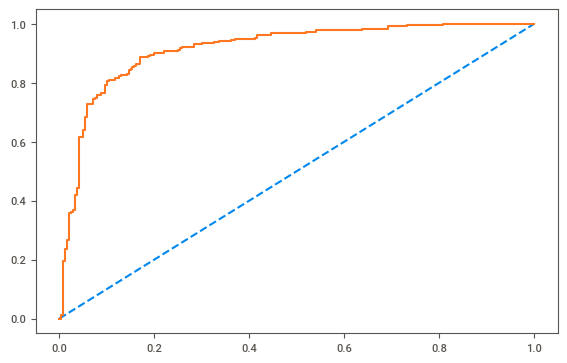

In [79]:
# roc curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate 2 class dataset
X2, y2 = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X2, y2, test_size=0.5, random_state=2)
# fit a model
model = XGBClassifier()
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()

In [80]:
# roc auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X1, y1 = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
# fit a model
model = XGBClassifier()
model.fit(X1_train,y1_train)
# predict probabilities
probs = model.predict_proba(X1_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc auc
auc = roc_auc_score(y1_test, probs)
print('Logistic Regression AUC Score:',auc)


Logistic Regression AUC Score: 0.9058610999598554


In [81]:
# generate 2 class dataset
X1, y1 = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
# fit a model
model_XGB = XGBClassifier()
model_XGB.fit(X1_train,y1_train)
# predict probabilities
probs_XGB = model.predict_proba(X1_test)
# keep probabilities for the positive outcome only
probs_XGB = probs_XGB[:, 1]
# calculate roc auc
auc_XGB = roc_auc_score(y1_test, probs_XGB)
print('XGBoost AUC Score:',auc_XGB)

XGBoost AUC Score: 0.9058610999598554


In [82]:
# generate 2 class dataset
X1, y1 = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
# fit a model
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X1_train, y1_train)
# predict probabilities
probs_DTC = model_DTC.predict_proba(X1_test)
# keep probabilities for the positive outcome only
probs_DTC = probs_DTC[:, 1]
# calculate roc auc
auc_DTC = roc_auc_score(y1_test, probs_DTC)
print('Decision Tree Classifier AUC Score:',auc_DTC)

Decision Tree Classifier AUC Score: 0.8051987153753513


# Cross Validation

In [83]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
modelCV_ = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X1_train, y1_train, cv=kfold, scoring=scoring)
results1 = model_selection.cross_val_score(modelCV_, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy balanced: %.3f" % (results.mean()))
print("10-fold cross validation average accuracy imbalanced: %.3f" % (results1.mean()))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy balanced: 0.864
10-fold cross validation average accuracy imbalanced: 0.854


In [84]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV1 = XGBClassifier()
modelCV_1= XGBClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV1, X1_train, y1_train, cv=kfold, scoring=scoring)
results2 = model_selection.cross_val_score(modelCV_1, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy balanced: %.3f" % (results.mean()))
print("10-fold cross validation average accuracy imbalanced: %.3f" % (results2.mean()))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy balanced: 0.863
10-fold cross validation average accuracy imbalanced: 0.862


In [85]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV2 = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV2, X1_train, y1_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.782


In [86]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV3 = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV3, X1_train, y1_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.866


Confusion matrix, without normalization
[[110  18]
 [ 17 105]]
Normalized confusion matrix
[[0.86 0.14]
 [0.14 0.86]]


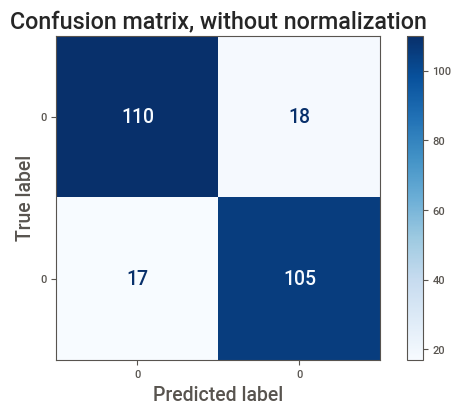

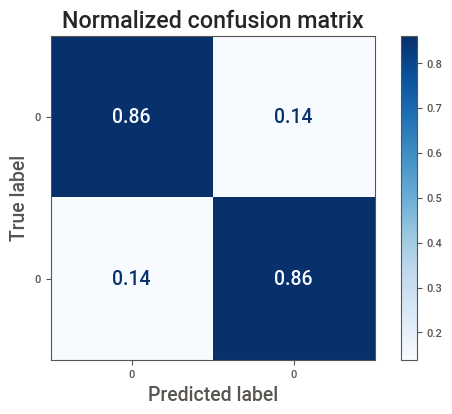

In [87]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# Split the data into a training set and a test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=10)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear').fit(X1_train, y1_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X1_test, y1_test,
                                 display_labels=df_2['Attrition'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[114  14]
 [ 15 107]]
Normalized confusion matrix
[[0.89 0.11]
 [0.12 0.88]]


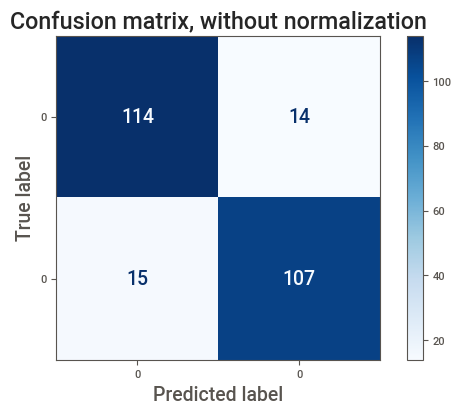

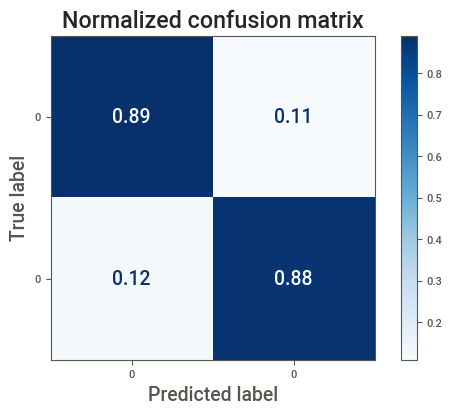

In [88]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier_xgb = XGBClassifier().fit(X1_train, y1_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier_xgb, X1_test, y1_test,
                                 display_labels=df_2['Attrition'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()